<a href="https://colab.research.google.com/github/SRIJANx17/Stock-Market-Prediction/blob/main/Stock_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NIFTY 50

<ipython-input-4-c0ef63488c38>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nifty_data['Volume'].fillna(0, inplace=True)
<ipython-input-4-c0ef63488c38>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

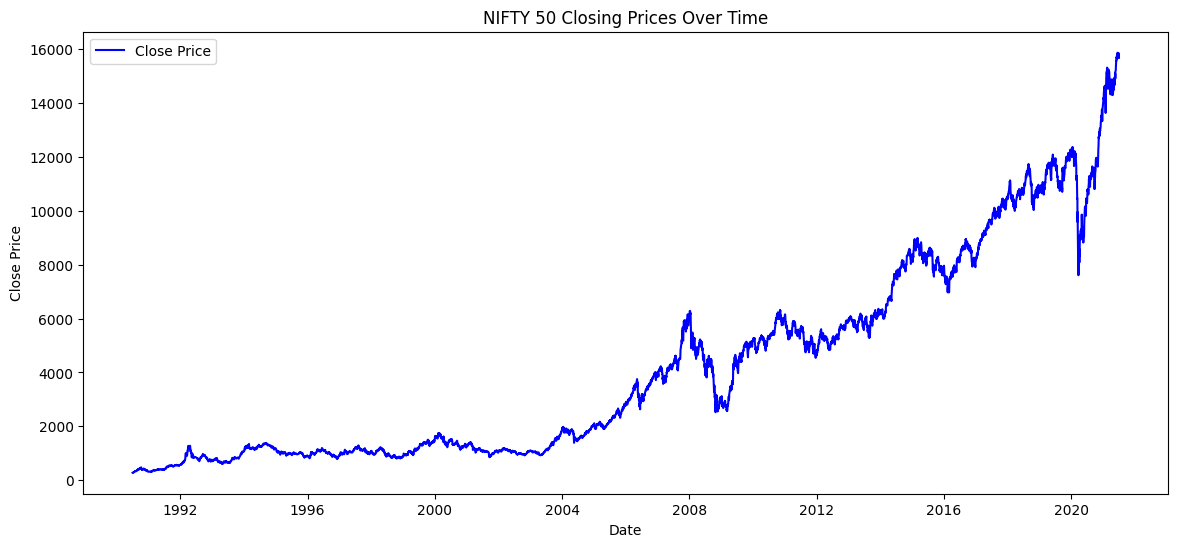

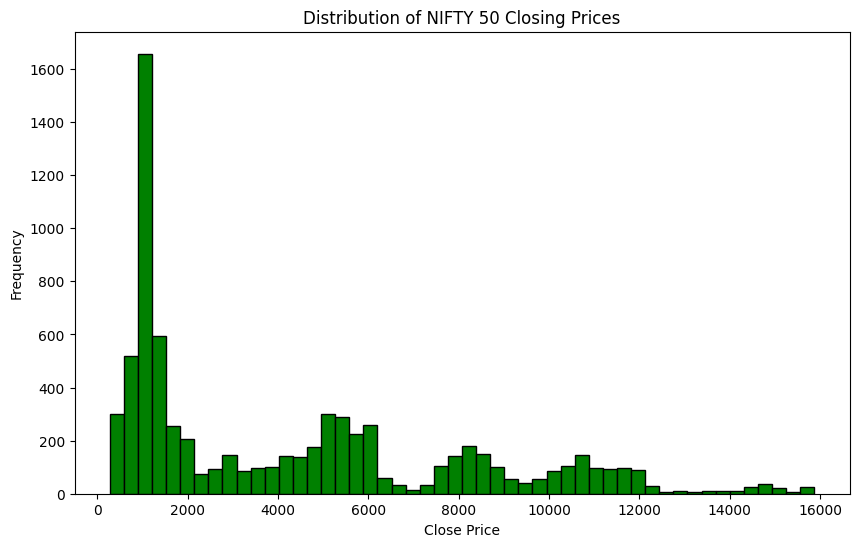

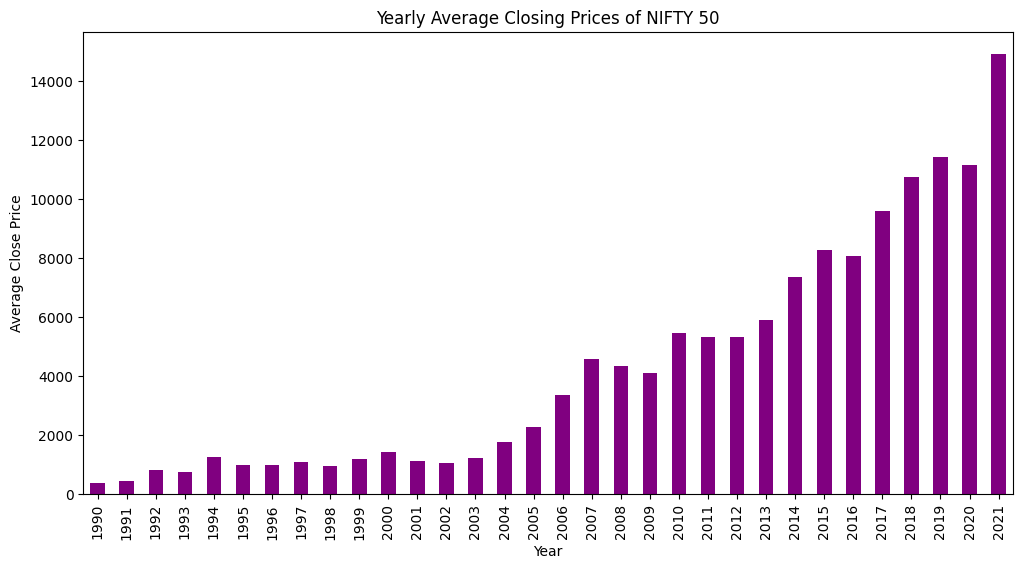

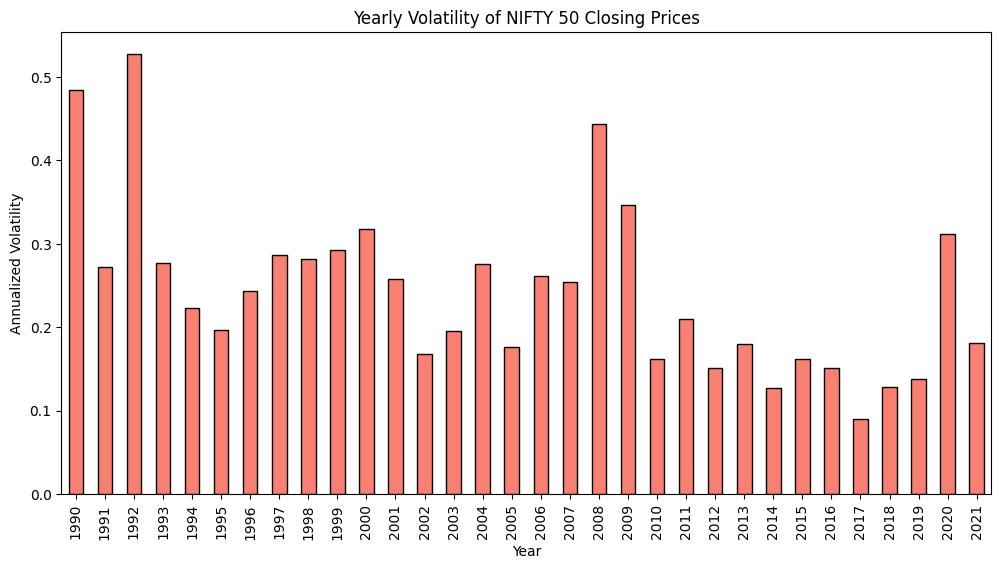

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/NIFTY 50.csv'  # Make sure to replace this with the actual file path
nifty_data = pd.read_csv(file_path)

# Convert 'Date' column to datetime format and set it as the index
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
nifty_data.set_index('Date', inplace=True)

# Fill missing values in Volume and Turnover with 0
nifty_data['Volume'].fillna(0, inplace=True)
nifty_data['Turnover'].fillna(0, inplace=True)

# 1. Line chart for closing prices over time
plt.figure(figsize=(14, 6))
plt.plot(nifty_data.index, nifty_data['Close'], color='blue', label='Close Price')
plt.title('NIFTY 50 Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# 2. Histogram of daily closing prices
plt.figure(figsize=(10, 6))
plt.hist(nifty_data['Close'], bins=50, color='green', edgecolor='black')
plt.title('Distribution of NIFTY 50 Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

# 3. Bar chart of yearly average closing prices
nifty_data['Year'] = nifty_data.index.year
yearly_avg_close = nifty_data.groupby('Year')['Close'].mean()

plt.figure(figsize=(12, 6))
yearly_avg_close.plot(kind='bar', color='purple')
plt.title('Yearly Average Closing Prices of NIFTY 50')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.show()

# 4. Calculate daily returns
nifty_data['Daily_Return'] = nifty_data['Close'].pct_change()

# 5. Calculate yearly volatility (annualized standard deviation of daily returns)
annual_volatility = nifty_data.groupby('Year')['Daily_Return'].std() * np.sqrt(252)  # 252 trading days

# 6. Plot yearly volatility
plt.figure(figsize=(12, 6))
annual_volatility.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Yearly Volatility of NIFTY 50 Closing Prices')
plt.xlabel('Year')
plt.ylabel('Annualized Volatility')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

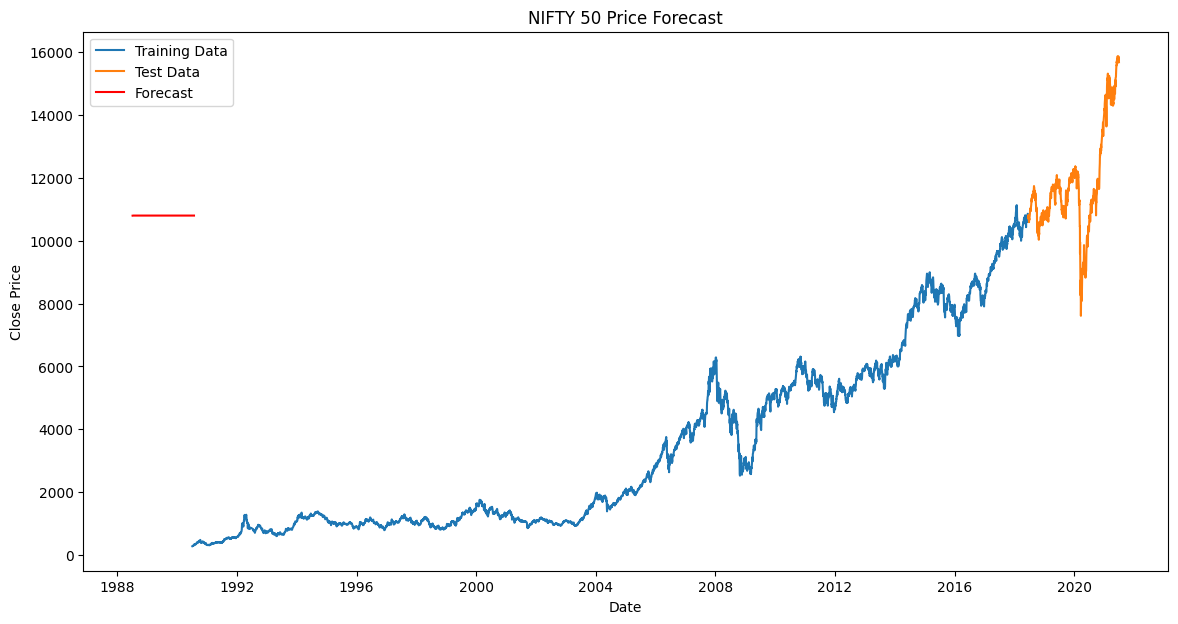

Root Mean Squared Error (RMSE): 1940.7377864192927


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the CSV file
file_path = '/content/NIFTY 50.csv'  # Make sure to replace this with your actual file path
nifty_data = pd.read_csv(file_path)

# Convert 'Date' column to datetime format and set it as the index
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
nifty_data.set_index('Date', inplace=True)

# Focus on the 'Close' column for forecasting
nifty_close = nifty_data['Close'].dropna()

# Split data into train and test sets (e.g., last 10% for testing)
train_size = int(len(nifty_close) * 0.9)
train, test = nifty_close[:train_size], nifty_close[train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Order (p,d,q) may need to be adjusted
model_fit = model.fit()

# Forecast for the test period
forecast = model_fit.forecast(steps=len(test))

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(forecast, label='Forecast', color='red')
plt.title('NIFTY 50 Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Calculate RMSE for the forecast
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"Root Mean Squared Error (RMSE): {rmse}")


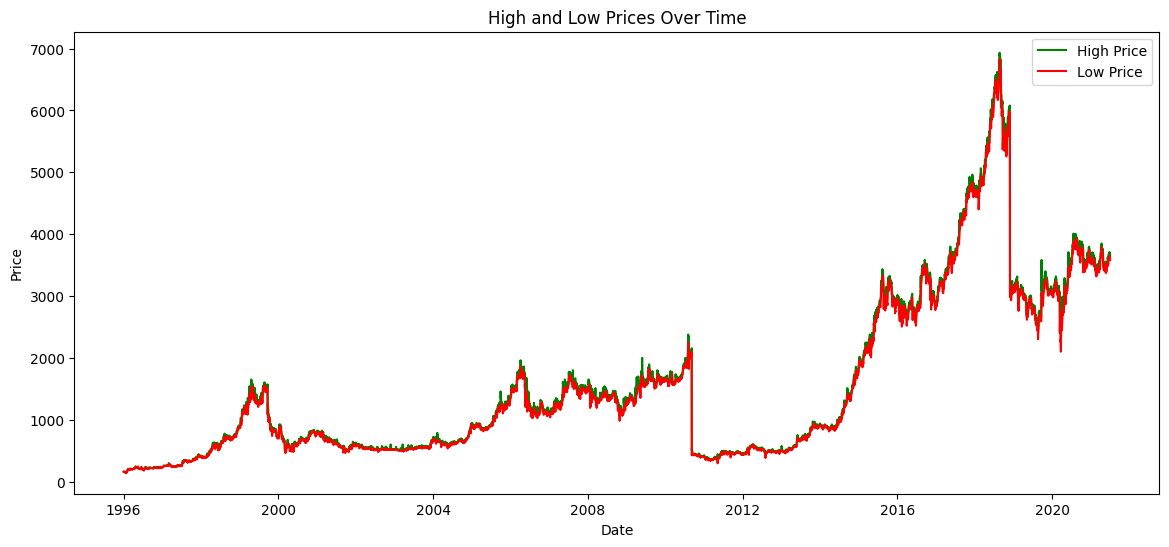

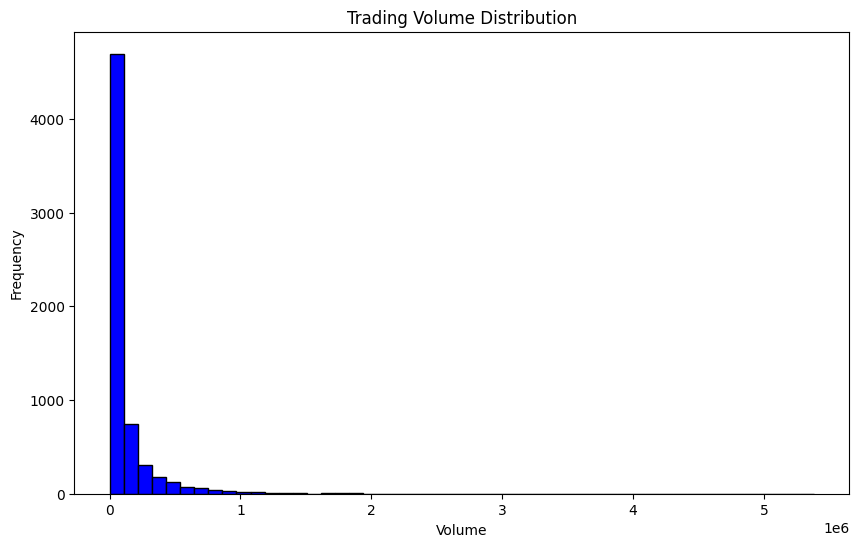

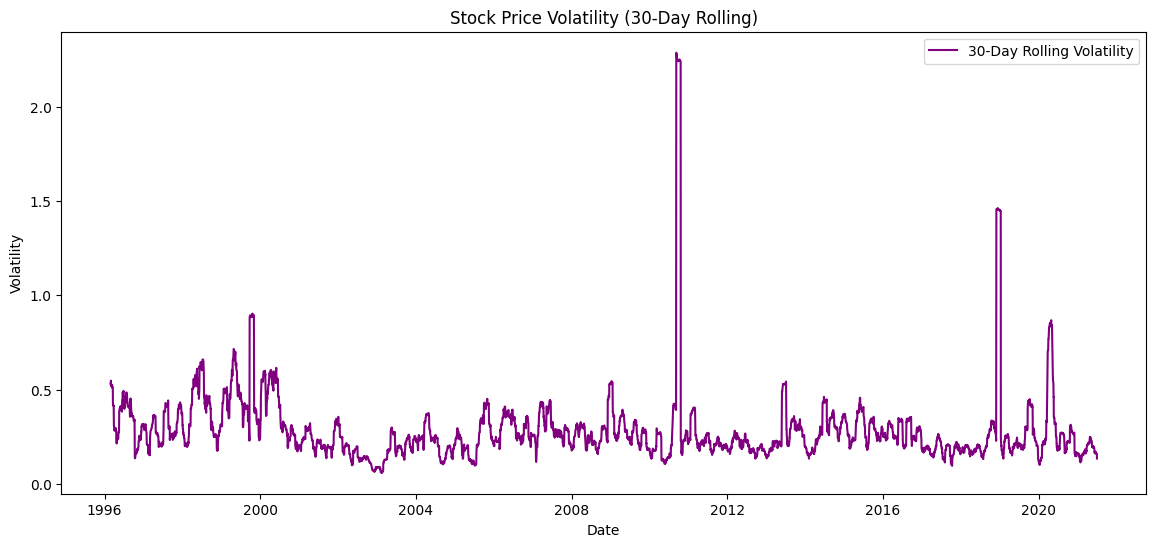

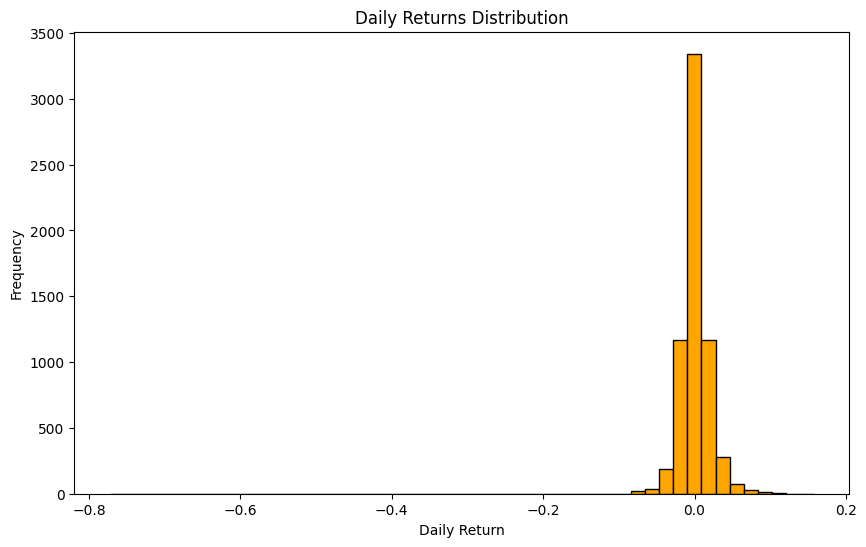

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/BRITANNIA.csv'
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 1. Plotting High and Low Prices over Time
plt.figure(figsize=(14, 6))
plt.plot(data['High'], label='High Price', color='green')
plt.plot(data['Low'], label='Low Price', color='red')
plt.title('High and Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 2. Histogram of Trading Volume
plt.figure(figsize=(10, 6))
plt.hist(data['Volume'].dropna(), bins=50, color='blue', edgecolor='black')
plt.title('Trading Volume Distribution')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

# 3. Calculating Daily Returns and Plotting Volatility
data['Daily_Return'] = data['Close'].pct_change()
data['Volatility'] = data['Daily_Return'].rolling(window=30).std() * np.sqrt(252)  # annualized 30-day rolling volatility

# Plotting 30-day Rolling Volatility
plt.figure(figsize=(14, 6))
plt.plot(data['Volatility'], label='30-Day Rolling Volatility', color='purple')
plt.title('Stock Price Volatility (30-Day Rolling)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# 4. Additional Histogram: Daily Returns
plt.figure(figsize=(10, 6))
plt.hist(data['Daily_Return'].dropna(), bins=50, color='orange', edgecolor='black')
plt.title('Daily Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


BRITANNIA

ADF Statistic: -1.3852379929861052
p-value: 0.589332393424239


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

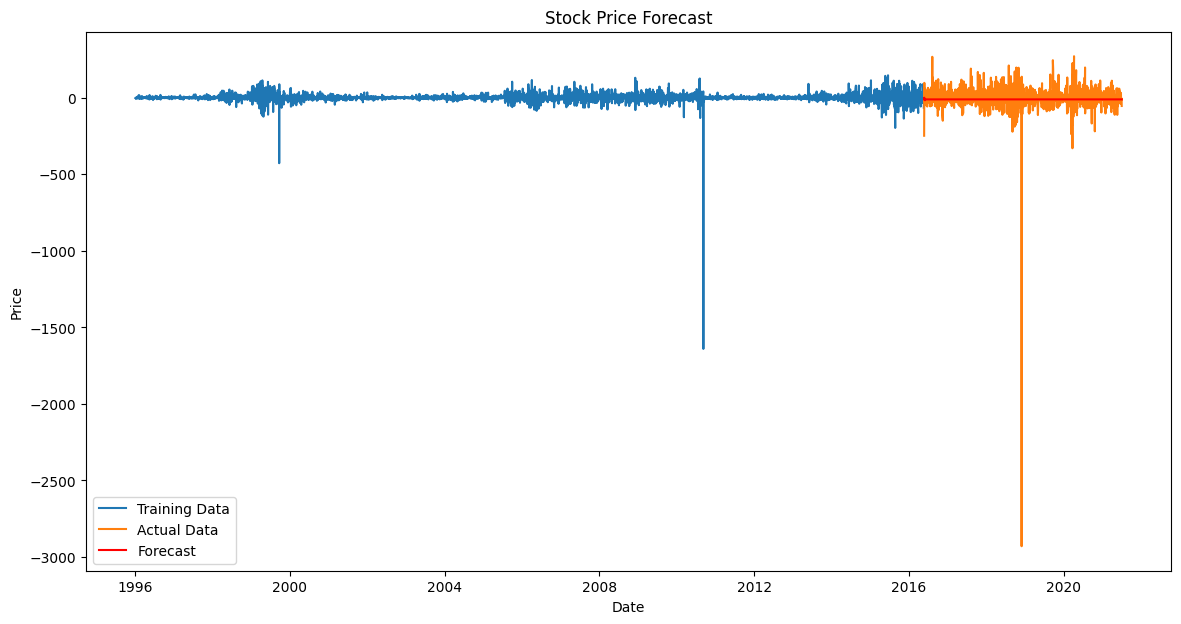

Mean Absolute Error: 43.547787869203525
Root Mean Square Error: 101.01211178794065


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the CSV file
file_path = '/content/BRITANNIA.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Use only the 'Close' column for forecasting
stock_close = data['Close'].dropna()

# Check for stationarity using the Augmented Dickey-Fuller test
result = adfuller(stock_close)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Difference the series if necessary (if p-value > 0.05)
if result[1] > 0.05:
    stock_close_diff = stock_close.diff().dropna()
else:
    stock_close_diff = stock_close

# Split the data into training and test sets
train_size = int(len(stock_close_diff) * 0.8)
train, test = stock_close_diff[:train_size], stock_close_diff[train_size:]

# Fit an ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Adjust (p, d, q) parameters as necessary
fitted_model = model.fit()

# Forecast the test period
forecast = fitted_model.forecast(steps=len(test))

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Data')
plt.plot(test.index, forecast, color='red', label='Forecast')
plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Evaluate the forecast
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Square Error: {rmse}')


RELIANCE

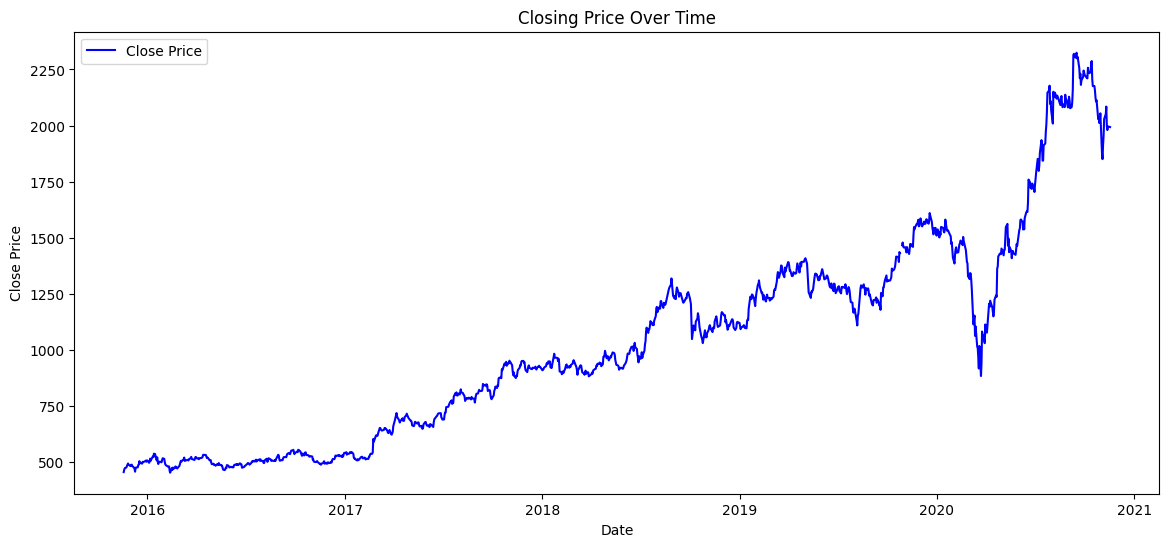

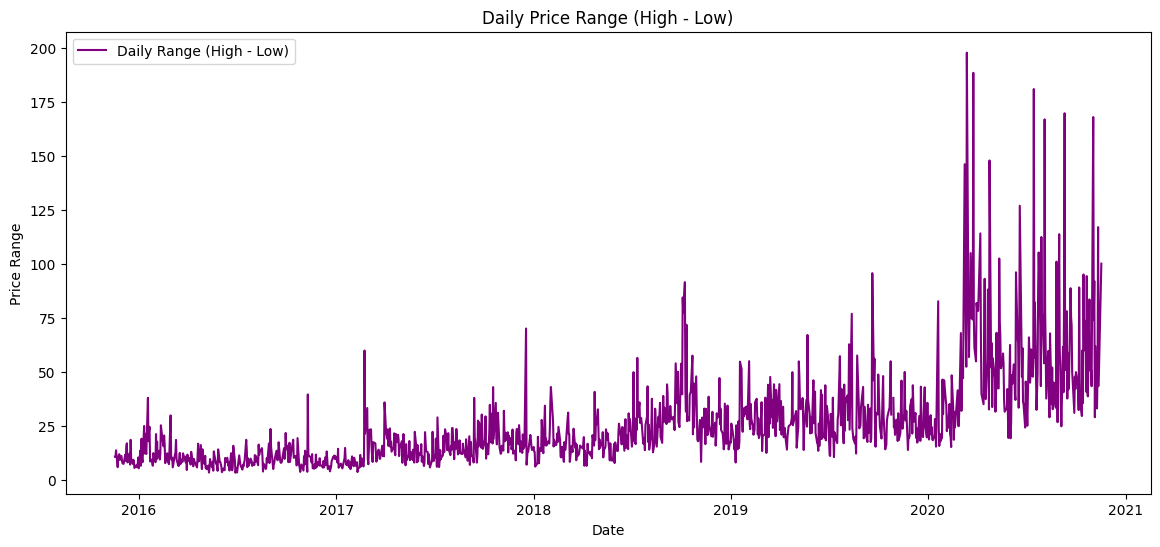

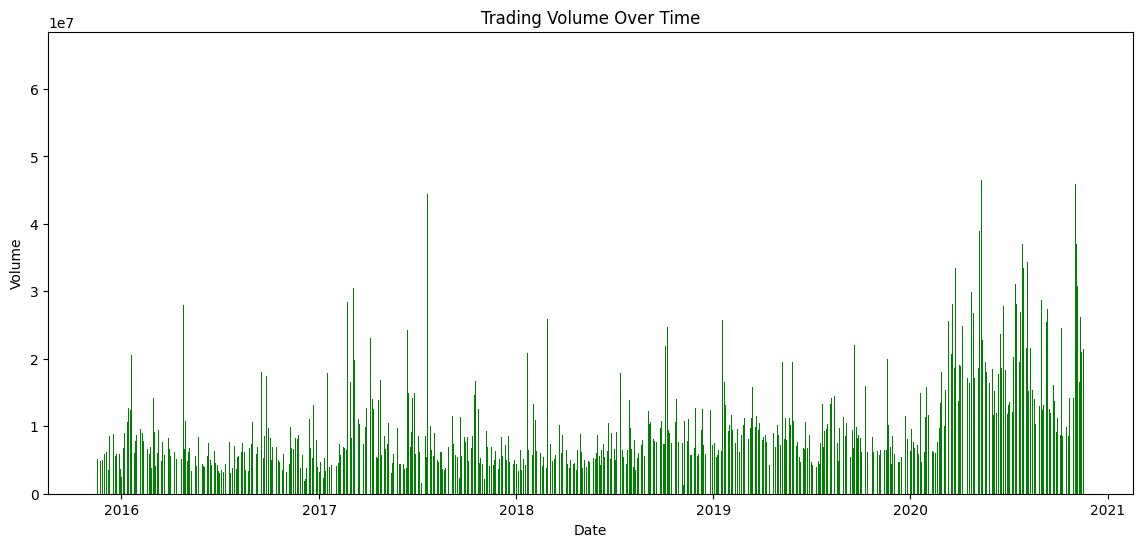

<ipython-input-3-d71ba529a671>:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data['Daily_Return'] = data['Close'].pct_change()


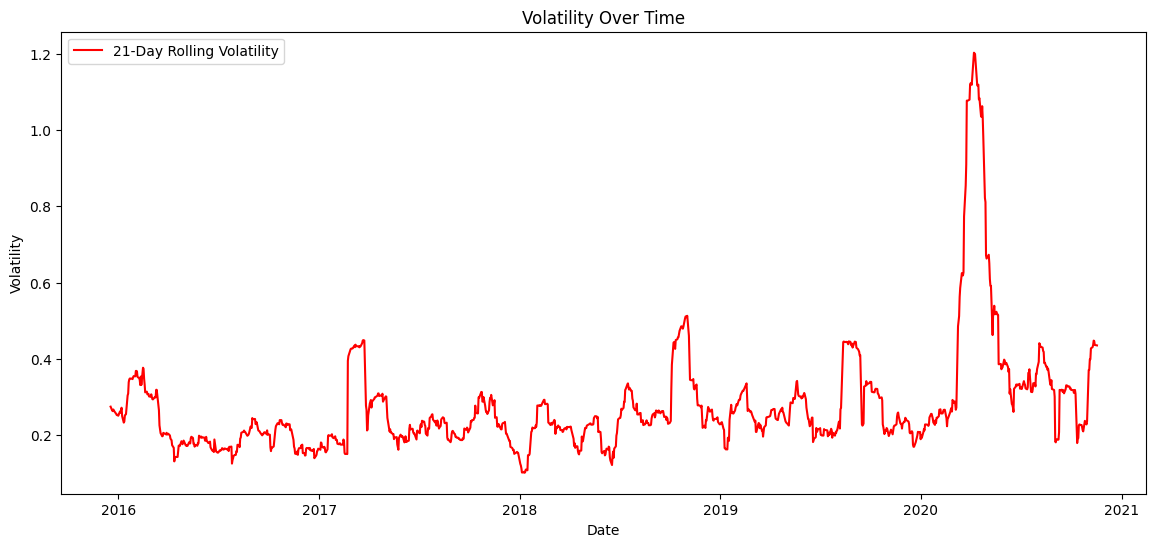

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/Reliance.csv'  # Replace with your actual file path if running locally
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Plot closing price over time
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Close'], color='blue', label='Close Price')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Calculate daily price range (high - low) and plot
data['Range'] = data['High'] - data['Low']
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Range'], color='purple', label='Daily Range (High - Low)')
plt.title('Daily Price Range (High - Low)')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.legend()
plt.show()

# Plot trading volume
plt.figure(figsize=(14, 6))
plt.bar(data.index, data['Volume'], color='green')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

# Calculate daily returns and volatility
data['Daily_Return'] = data['Close'].pct_change()
data['Volatility'] = data['Daily_Return'].rolling(window=21).std() * np.sqrt(252)  # 21-day rolling volatility

# Plot volatility over time
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Volatility'], color='red', label='21-Day Rolling Volatility')
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


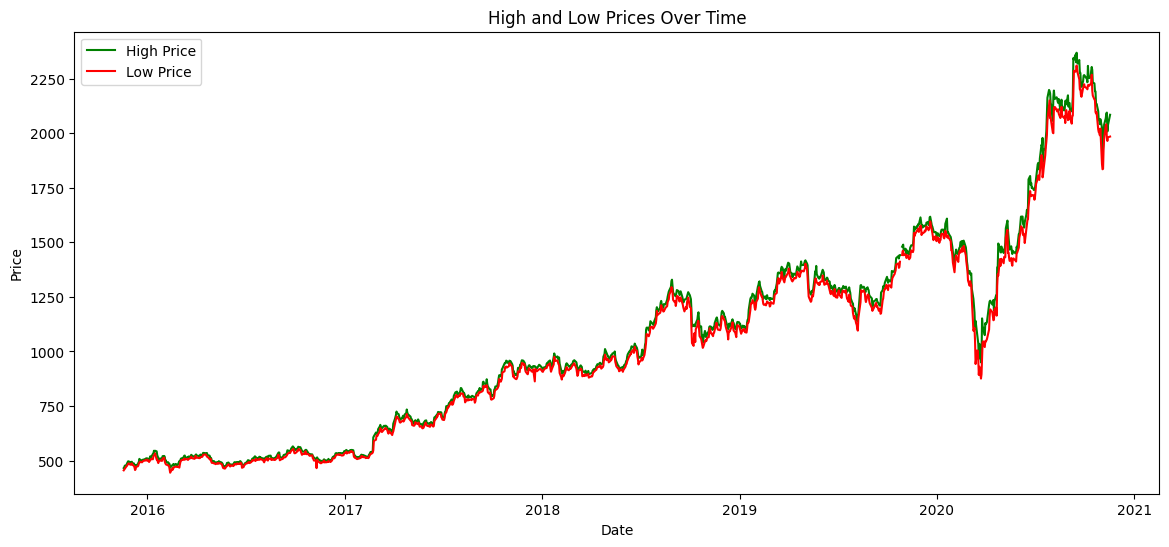

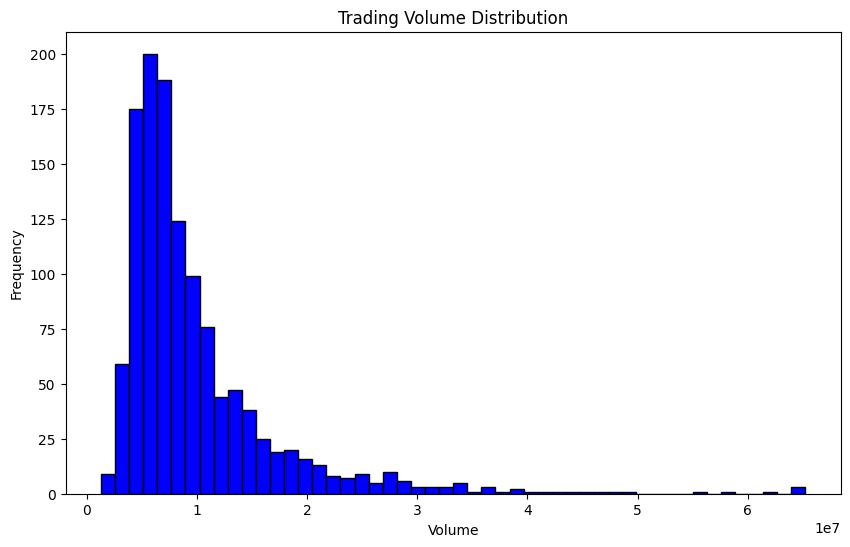

<ipython-input-5-18bc50e5f1ea>:32: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data['Daily_Return'] = data['Close'].pct_change()


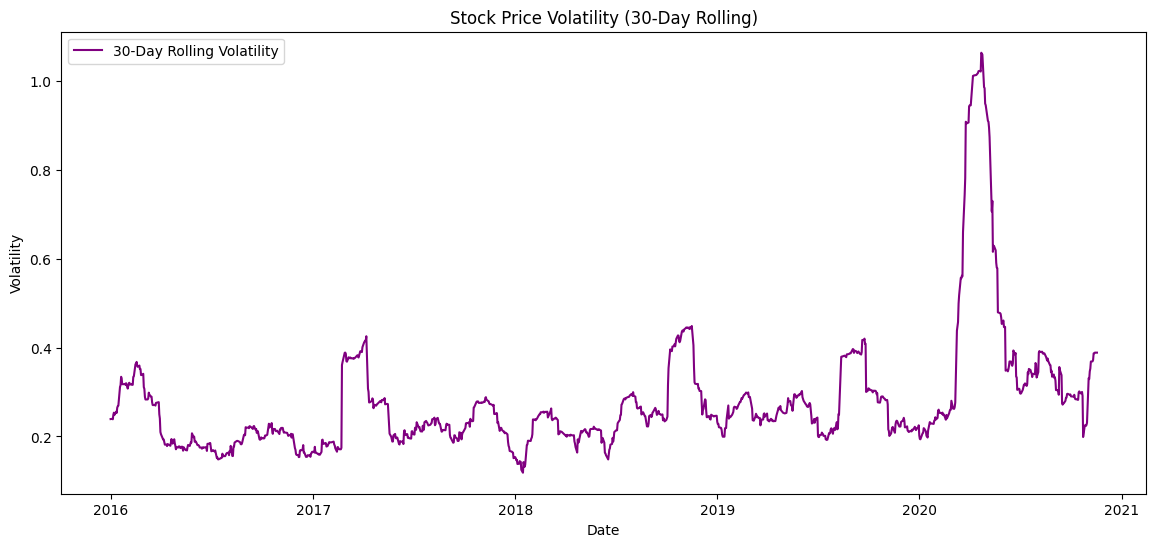

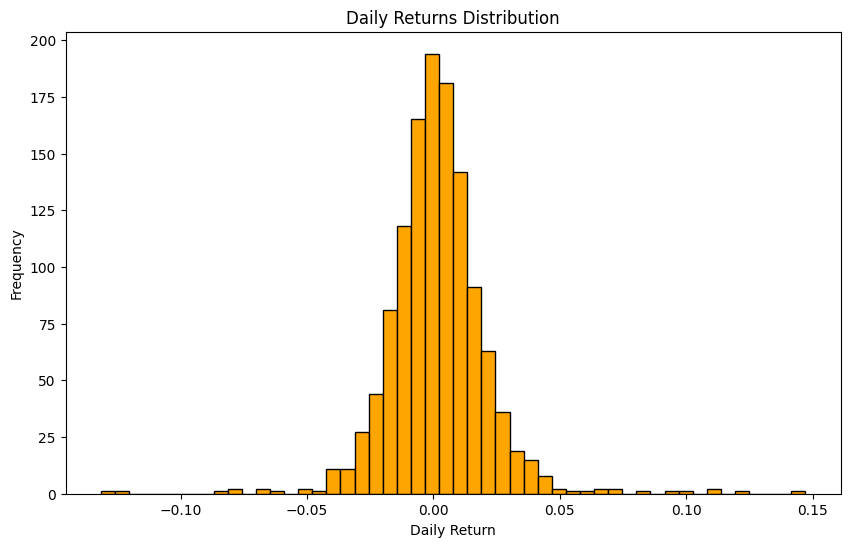

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/Reliance.csv'
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 1. Plotting High and Low Prices over Time
plt.figure(figsize=(14, 6))
plt.plot(data['High'], label='High Price', color='green')
plt.plot(data['Low'], label='Low Price', color='red')
plt.title('High and Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 2. Histogram of Trading Volume
plt.figure(figsize=(10, 6))
plt.hist(data['Volume'].dropna(), bins=50, color='blue', edgecolor='black')
plt.title('Trading Volume Distribution')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

# 3. Calculating Daily Returns and Plotting Volatility
data['Daily_Return'] = data['Close'].pct_change()
data['Volatility'] = data['Daily_Return'].rolling(window=30).std() * np.sqrt(252)  # annualized 30-day rolling volatility

# Plotting 30-day Rolling Volatility
plt.figure(figsize=(14, 6))
plt.plot(data['Volatility'], label='30-Day Rolling Volatility', color='purple')
plt.title('Stock Price Volatility (30-Day Rolling)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# 4. Histogram of Daily Returns
plt.figure(figsize=(10, 6))
plt.hist(data['Daily_Return'].dropna(), bins=50, color='orange', edgecolor='black')
plt.title('Daily Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

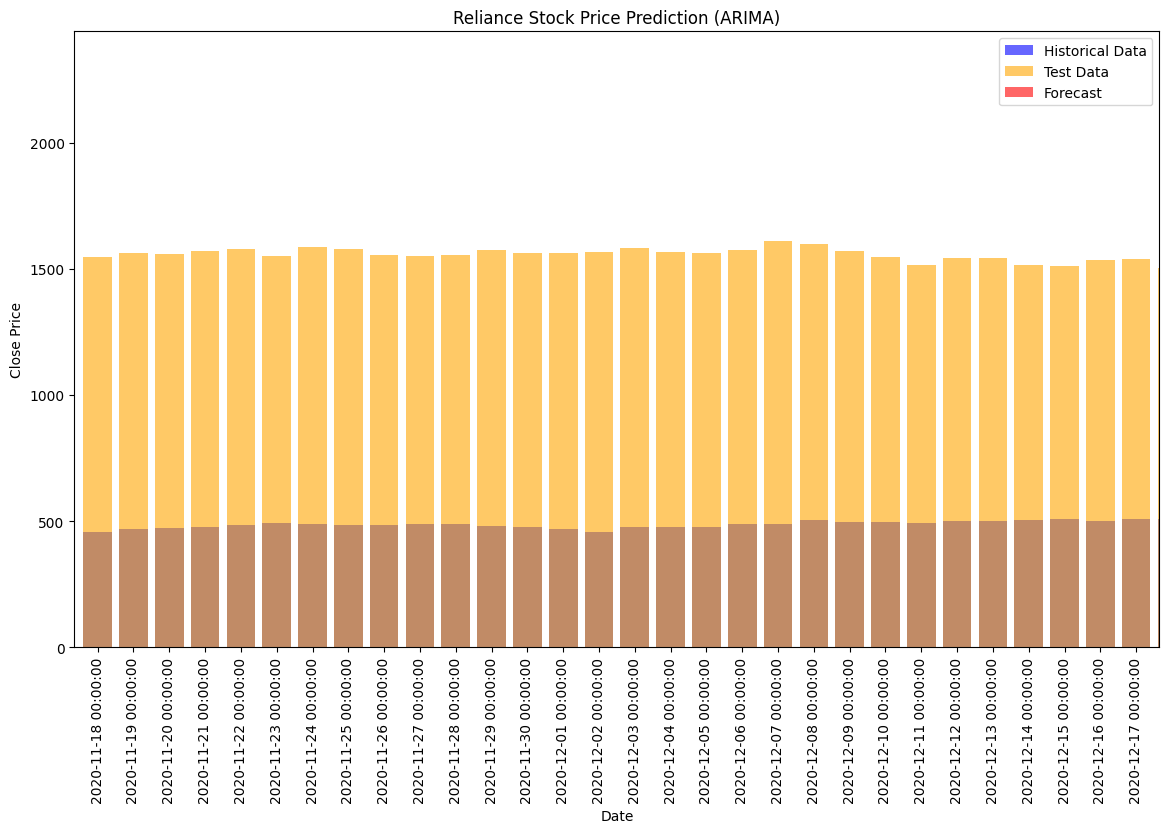

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '/content/Reliance.csv'
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime format and set it as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Ensure we're using the 'Close' column for time series
reliance_close = data['Close'].dropna()

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(reliance_close) * 0.8)
train_data, test_data = reliance_close[:train_size], reliance_close[train_size:]

# Fit an ARIMA model on training data
model = ARIMA(train_data, order=(5, 1, 0))  # ARIMA order (p, d, q) may need tuning for best results
fitted_model = model.fit()

# Forecast future values for the next 30 days
forecast_steps = 30
forecast = fitted_model.forecast(steps=forecast_steps)

# Combine test data and forecast for a comparison bar chart
dates = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
forecast_series = pd.Series(forecast, index=dates)

# Plot the original data and forecast as a bar chart
plt.figure(figsize=(14, 8))

# Plot historical data as bars
train_data.plot(kind='bar', color='blue', width=0.8, label='Historical Data', alpha=0.6)
test_data.plot(kind='bar', color='orange', width=0.8, label='Test Data', alpha=0.6)
forecast_series.plot(kind='bar', color='red', width=0.8, label='Forecast', alpha=0.6)

plt.title('Reliance Stock Price Prediction (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

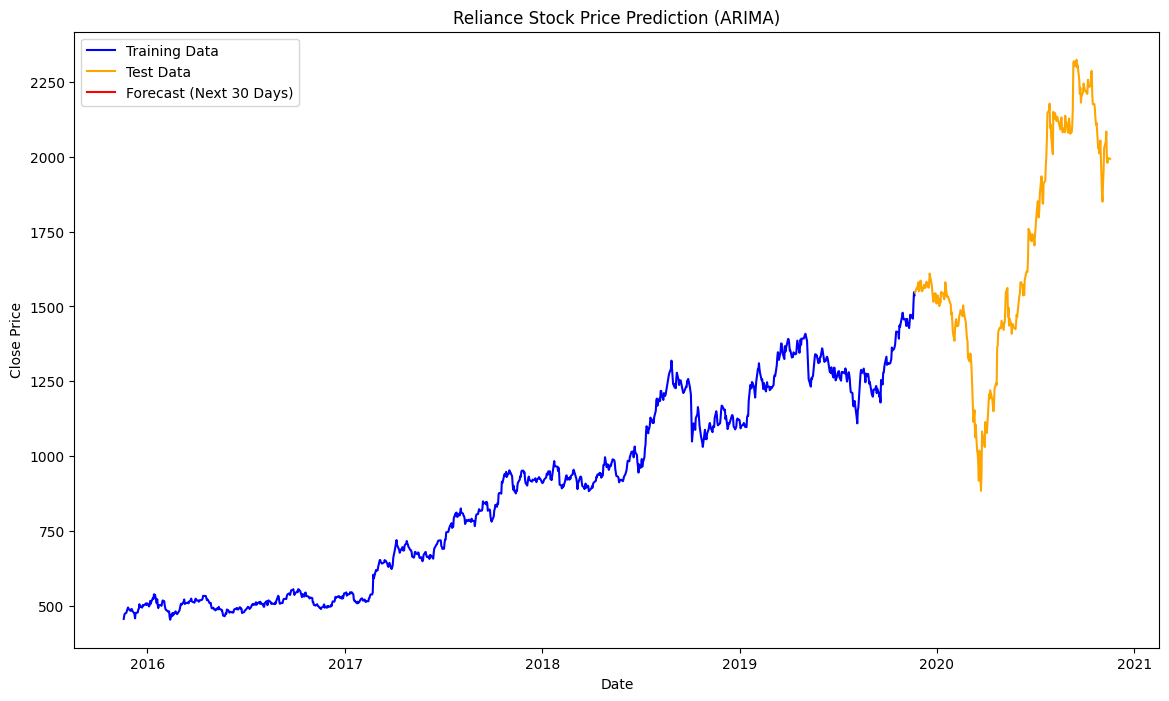

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/Reliance.csv'
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime format and set it as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Ensure we're using the 'Close' column for time series
reliance_close = data['Close'].dropna()

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(reliance_close) * 0.8)
train_data, test_data = reliance_close[:train_size], reliance_close[train_size:]

# Fit an ARIMA model on training data
model = ARIMA(train_data, order=(5, 1, 0))  # ARIMA order (p, d, q) may need tuning for best results
fitted_model = model.fit()

# Forecast future values for the next 30 days
forecast_steps = 30
forecast = fitted_model.forecast(steps=forecast_steps)

# Combine test data and forecast for comparison
dates = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
forecast_series = pd.Series(forecast, index=dates)

# Plot historical data and forecasted values on a line chart
plt.figure(figsize=(14, 8))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data, label='Test Data', color='orange')
plt.plot(forecast_series, label='Forecast (Next 30 Days)', color='red')

plt.title('Reliance Stock Price Prediction (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


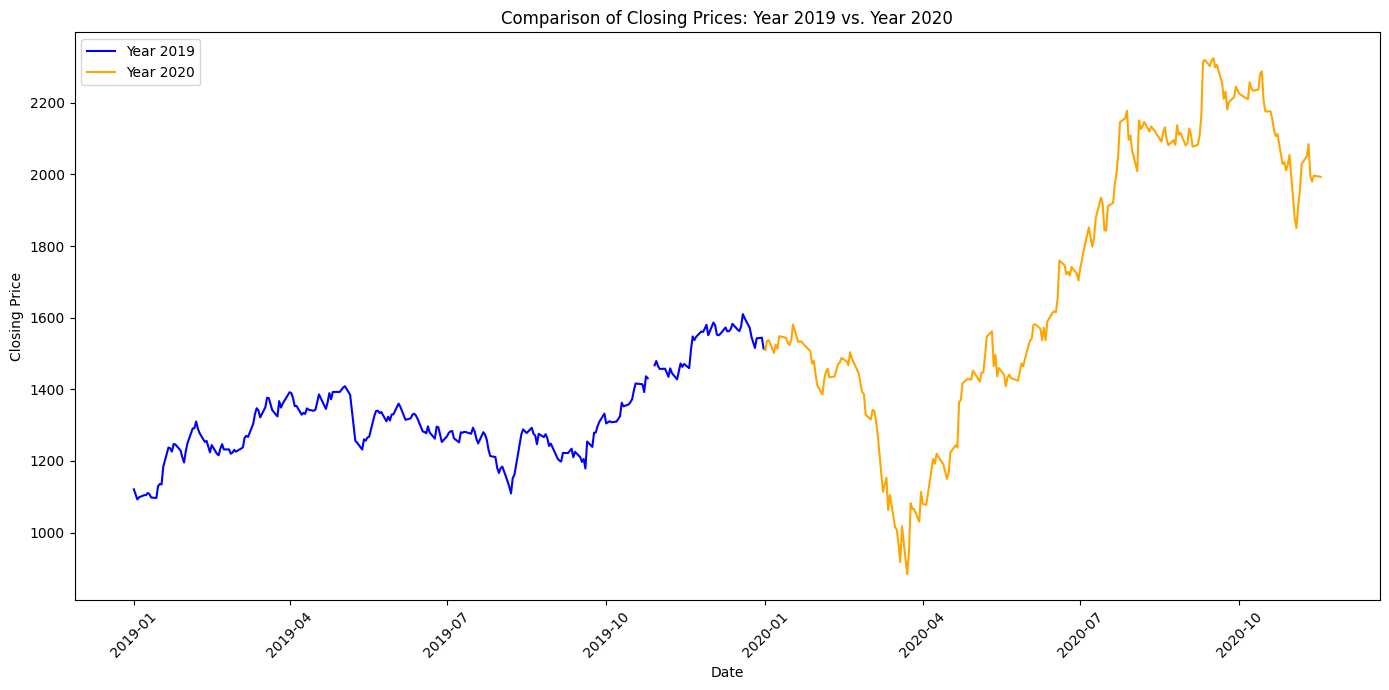

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/Reliance.csv')  # Replace with the path to your file
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' to datetime format

# Determine the last year in the dataset
last_year = data['Date'].dt.year.max()

# Filter data for the last full year and the previous year
data_last_year = data[data['Date'].dt.year == last_year]
data_prev_year = data[data['Date'].dt.year == (last_year - 1)]

# Plotting the closing prices for both years
plt.figure(figsize=(14, 7))

# Plot previous year's closing prices
plt.plot(data_prev_year['Date'], data_prev_year['Close'], label=f'Year {last_year - 1}', color='blue')

# Plot last year's closing prices
plt.plot(data_last_year['Date'], data_last_year['Close'], label=f'Year {last_year}', color='orange')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'Comparison of Closing Prices: Year {last_year - 1} vs. Year {last_year}')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()
